## Observations and Insights 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#combined_study = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')
combined_study = pd.merge(study_results,mouse_metadata,how='left',on='Mouse ID')
# Display the data table for preview
combined_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [119]:
duplicate_mice = combined_study.loc[combined_study.duplicated(subset =['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [120]:
duplicate_mice_data = combined_study.loc[combined_study["Mouse ID"]=="g989"]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [ ]:
# Checking the number of mice in the clean DataFrame.

In [121]:
clean_data_df = combined_study[combined_study['Mouse ID'].isin(duplicate_mice)==False]
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [54]:
# Checking the number of mice.


In [122]:
mouse_count = combined_study['Mouse ID'].nunique()
mouse_count

249

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 



In [117]:

#new_mouse_count = combined_study['Mouse ID'].nunique()
#new_mouse_count

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#  and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

clean_mouse_df = clean_data_df.groupby("Drug Regimen")
clean_mouse_df.first()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.0,0,Female,9,22
Ceftamin,x822,0,45.0,0,Male,3,29
Infubinol,c326,0,45.0,0,Female,18,25
Ketapril,f932,0,45.0,0,Male,15,29
Naftisol,f993,0,45.0,0,Male,21,28
Placebo,a897,0,45.0,0,Male,7,28
Propriva,n630,0,45.0,0,Female,15,29
Ramicane,c458,0,45.0,0,Female,23,20
Stelasyn,f234,0,45.0,0,Male,14,28


In [124]:
gender = clean_mouse_df['Sex']
gender.head()

0      Female
1        Male
2      Female
3      Female
4        Male
5        Male
9        Male
10     Female
11       Male
13       Male
14       Male
29     Female
30       Male
31       Male
32     Female
33     Female
57       Male
58     Female
59     Female
60     Female
61       Male
62     Female
68       Male
82       Male
83     Female
84     Female
114      Male
115    Female
116      Male
117    Female
118    Female
136    Female
139      Male
141      Male
142      Male
143      Male
144    Female
145      Male
167      Male
168    Female
169      Male
170      Male
171    Female
172    Female
173    Female
174      Male
226    Female
227    Female
228    Female
229      Male
Name: Sex, dtype: object

In [126]:
#mouse_count_df = clean_data_df["Mouse ID"].count()
#mouse_count_df.head()

In [127]:
avg_tumor = clean_mouse_df['Tumor Volume (mm3)'].mean()
avg_tumor

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [128]:
median_tumor = clean_mouse_df['Tumor Volume (mm3)'].median()
median_tumor

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [129]:
var_tumor = clean_mouse_df['Tumor Volume (mm3)'].var()
var_tumor

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [130]:
stddev_tumor = clean_mouse_df['Tumor Volume (mm3)'].std()
stddev_tumor

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [131]:
sem_tumor = clean_mouse_df['Tumor Volume (mm3)'].sem()
sem_tumor

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [132]:
sum_stats_df = pd.DataFrame({
                                  "Average":avg_tumor, 
                                   "Median":median_tumor, 
                                   "Variance":var_tumor,
                                    "Standard Deviation":stddev_tumor,
                                    "Standard Error of the Mean":sem_tumor,
                                    })
sum_stats_df.head(10)

,Average,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [ ]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

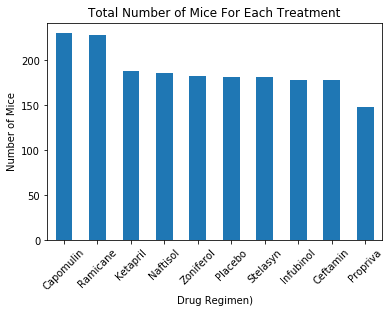

In [145]:
bar_num_mice = clean_data_df["Drug Regimen"].value_counts()
#bar_num_mice = combined_study.set_index("Drug Regimen")
bar_num_mice.plot(kind ="bar", rot=45)
plt.xlabel('Drug Regimen)')
plt.ylabel('Number of Mice')
plt.title('Total Number of Mice For Each Treatment')
plt.show()

In [73]:
bar_num_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

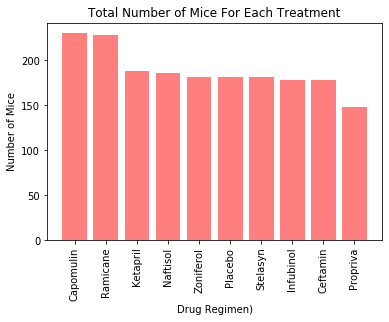

In [144]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#x_axis = np.arange(len(mouse_count_df))
#x_axis = np.arange(len(mouse_count_df))
#tick_locations = [value for value in x_axis]
#plt.bar(clean_mouse_df("Drug Regimen"), clean_mouse_df("Number of Mice"), color='r', alpha=0.5, align="center")
plt.bar(bar_num_mice.index.values, bar_num_mice.values, color='r', alpha=0.5, align="center")
plt.xlabel('Drug Regimen)')
plt.xticks(rotation=90)
plt.ylabel('Number of Mice')
plt.title('Total Number of Mice For Each Treatment')
# plt.xticks(tick_locations, mouse_count_df["Drug Regimen"], rotation="vertical")
plt.show()

In [75]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#multi_plot = sum_stats_df.plot(kind="bar", figsize=(20,5))
#multi_plot.set_xticklabels(sum_stats_df["Drug Regimen"], rotation=45)

In [76]:
gender_group = clean_data_df.groupby('Sex')
gender_count = gender_group["Mouse ID"].count()
gender_count


Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

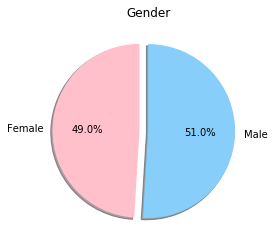

In [77]:
labels = ["Female","Male"]
colors = ["Pink", "lightskyblue"]
explode = (0.1, 0.00)
plt.title("Gender")
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

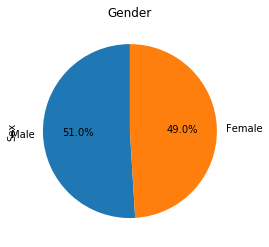

In [147]:
mice_pie = clean_data_df.Sex.value_counts()
mice_pie.plot(kind='pie', autopct='%1.1f%%',startangle=90)

plt.title("Gender")
plt.show()
# gender_count, explode=explode, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=90

## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data_df.groupby(["Mouse ID"])['Timepoint'].max()
greatest_timepoint = greatest_timepoint.reset_index()
greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_mice_data = greatest_timepoint.merge(clean_data_df, on=['Mouse ID','Timepoint'],how ="left")
merge_mice_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [88]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treat_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = merge_mice_data.loc[merge_mice_data["Drug Regimen"] == i, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(final_tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    inter_quartile = upper_quartile - lower_quartile
    lowerB = lower_quartile - (1.5*inter_quartile)
    upperB = upper_quartile + (1.5*inter_quartile)
    find_outliers = final_tumor.loc[(final_tumor < lowerB) | (final_tumor > upperB)]
    print(f"{i} the outliers is {find_outliers}")
    

Capomulin the outliers is Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane the outliers is Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol the outliers is 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin the outliers is Series([], Name: Tumor Volume (mm3), dtype: float64)


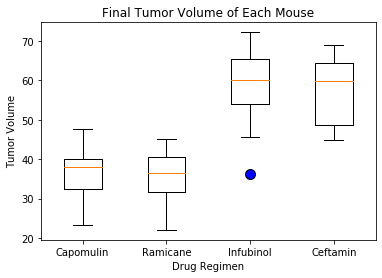

In [149]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue = dict(markerfacecolor = 'blue', markersize = 10)
plt.boxplot(tumor_vol_data, labels = treat_list, flierprops = blue)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume')
plt.title('Final Tumor Volume of Each Mouse')
plt.show()

## Line and Scatter Plots

In [153]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin #b128
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


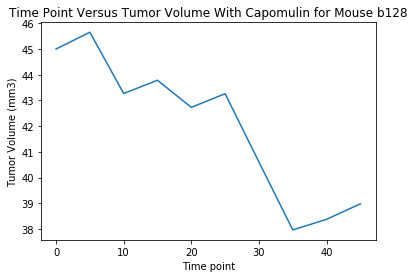

In [154]:
capomulin_data = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']
specific_mouse= mouse_line.loc[capomulin_data['Mouse ID']=='b128']
plt.plot(specific_mouse['Timepoint'], specific_mouse["Tumor Volume (mm3)"] )
plt.xlabel('Time point')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Time Point Versus Tumor Volume With Capomulin for Mouse b128')
plt.show()

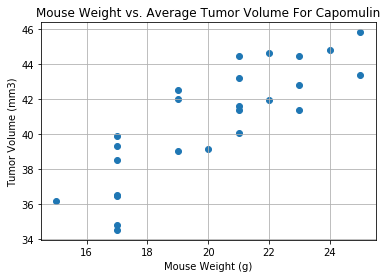

In [155]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_avg = capomulin_data.groupby(['Mouse ID']).mean()
capomulin_avg
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.title("Mouse Weight vs. Average Tumor Volume For Capomulin")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [158]:
weight = capomulin_avg['Weight (g)']
weight.head()

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
Name: Weight (g), dtype: float64

In [159]:
tumor_volume = capomulin_avg['Tumor Volume (mm3)']
tumor_volume.head()

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
Name: Tumor Volume (mm3), dtype: float64

In [160]:
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


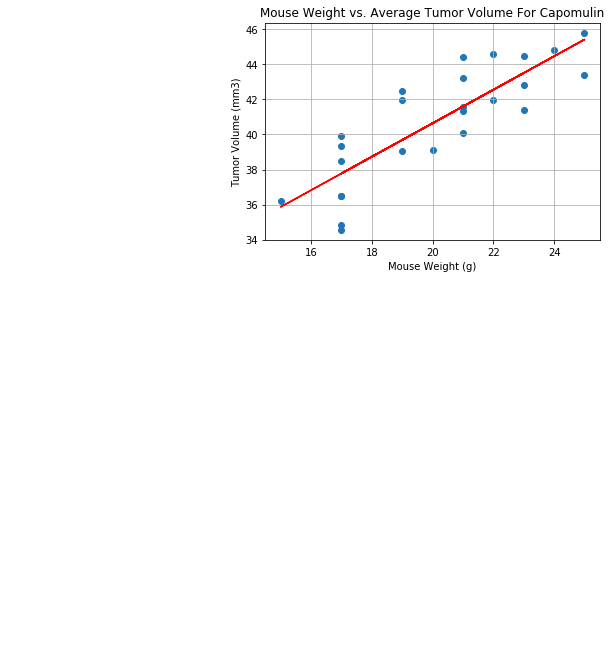

In [161]:
x_values = weight
y_values = tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Mouse Weight vs. Average Tumor Volume For Capomulin")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()